# Rf 3 0 5_Condcorrprod
Multidimensional models: multi-dimensional p.d.f.s with conditional p.d.fs in product

pdf = gauss(x,f(y),sx | y ) * gauss(y,ms,sx)    with f(y) = a0 + a1*y




**Author:** Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:47 AM.</small></i>

In [1]:
import ROOT

Welcome to JupyROOT 6.18/03


Create conditional pdf gx(x|y)
-----------------------------------------------------------

Create observables

In [2]:
x = ROOT.RooRealVar("x", "x", -5, 5)
y = ROOT.RooRealVar("y", "y", -5, 5)


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Create function f(y) = a0 + a1*y

In [3]:
a0 = ROOT.RooRealVar("a0", "a0", -0.5, -5, 5)
a1 = ROOT.RooRealVar("a1", "a1", -0.5, -1, 1)
fy = ROOT.RooPolyVar("fy", "fy", y, ROOT.RooArgList(a0, a1))

Create gaussx(x,f(y),sx)

In [4]:
sigmax = ROOT.RooRealVar("sigma", "width of gaussian", 0.5)
gaussx = ROOT.RooGaussian(
    "gaussx", "Gaussian in x with shifting mean in y", x, fy, sigmax)

Create pdf gy(y)
-----------------------------------------------------------

Create gaussy(y,0,5)

In [5]:
gaussy = ROOT.RooGaussian(
    "gaussy",
    "Gaussian in y",
    y,
    ROOT.RooFit.RooConst(0),
    ROOT.RooFit.RooConst(3))

Create product gx(x|y)*gy(y)
-------------------------------------------------------

Create gaussx(x,sx|y) * gaussy(y)

In [6]:
model = ROOT.RooProdPdf(
    "model",
    "gaussx(x|y)*gaussy(y)",
    ROOT.RooArgSet(gaussy),
    ROOT.RooFit.Conditional(
        ROOT.RooArgSet(gaussx),
        ROOT.RooArgSet(x)))

Sample, fit and plot product pdf
---------------------------------------------------------------

Generate 1000 events in x and y from model

In [7]:
data = model.generate(ROOT.RooArgSet(x, y), 10000)

Plot x distribution of data and projection of model x = Int(dy)
model(x,y)

In [8]:
xframe = x.frame()
data.plotOn(xframe)
model.plotOn(xframe)

<ROOT.RooPlot object ("frame_x_561a05c5fae0") at 0x561a05c5fae0>

[#1] INFO:Plotting -- RooAbsReal::plotOn(model) plot on x integrates over variables (y)
[#1] INFO:NumericIntegration -- RooRealIntegral::init([gaussy_NORM[y]_X_gaussx_NORM[x]]_Int[y]) using numeric integrator RooIntegrator1D to calculate Int(y)


Plot x distribution of data and projection of model y = Int(dx)
model(x,y)

In [9]:
yframe = y.frame()
data.plotOn(yframe)
model.plotOn(yframe)

<ROOT.RooPlot object ("frame_y_561a05d29320") at 0x561a05d29320>

[#1] INFO:Plotting -- RooAbsReal::plotOn(model) plot on y integrates over variables (x)


Make two-dimensional plot in x vs y

In [10]:
hh_model = model.createHistogram("hh_model", x, ROOT.RooFit.Binning(
    50), ROOT.RooFit.YVar(y, ROOT.RooFit.Binning(50)))
hh_model.SetLineColor(ROOT.kBlue)

Make canvas and draw ROOT.RooPlots

In [11]:
c = ROOT.TCanvas("rf305_condcorrprod", "rf05_condcorrprod", 1200, 400)
c.Divide(3)
c.cd(1)
ROOT.gPad.SetLeftMargin(0.15)
xframe.GetYaxis().SetTitleOffset(1.6)
xframe.Draw()
c.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
yframe.GetYaxis().SetTitleOffset(1.6)
yframe.Draw()
c.cd(3)
ROOT.gPad.SetLeftMargin(0.20)
hh_model.GetZaxis().SetTitleOffset(2.5)
hh_model.Draw("surf")

c.SaveAs("rf305_condcorrprod.png")

Info in <TCanvas::Print>: png file rf305_condcorrprod.png has been created


Draw all canvases 

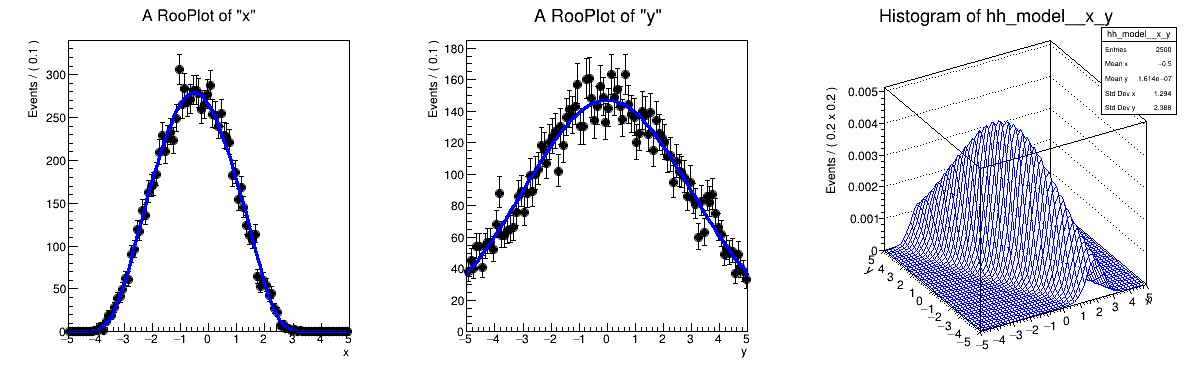

In [12]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()